In [1]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import model_selection #сплитование выборки
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время.

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Проверка данныз на анличие пропусков
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Удаление номера строки, есть ID клиента
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [5]:
# Проверка на наличие дубликатов
churn_data[churn_data.duplicated()].sum()

CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

Целевой признак - Exited

RowNumber — номер строки таблицы;\
CustomerId — идентификатор клиента;\
Surname — фамилия клиента;\
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);\
Geography — страна проживания клиента (банк межнациональный);\
Gender — пол клиента;\
Age — возраст клиента;\
Tenure — сколько лет клиент пользуется банком;\
Balance — сколько у клиента денег на счетах в банке;\
NumOfProduct — число услуг банка, которыми воспользовался клиент;\
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);\
IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);\
EstimatedSalary — предполагаемая заработная плата клиента;\
Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [6]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


### Визуализация зависимостей

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Числовые признаки
numeric_cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 
                'NumOfProducts', 'EstimatedSalary']
# Категориальные признаки
cat_cols = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Целевая переменная
target = 'Exited'

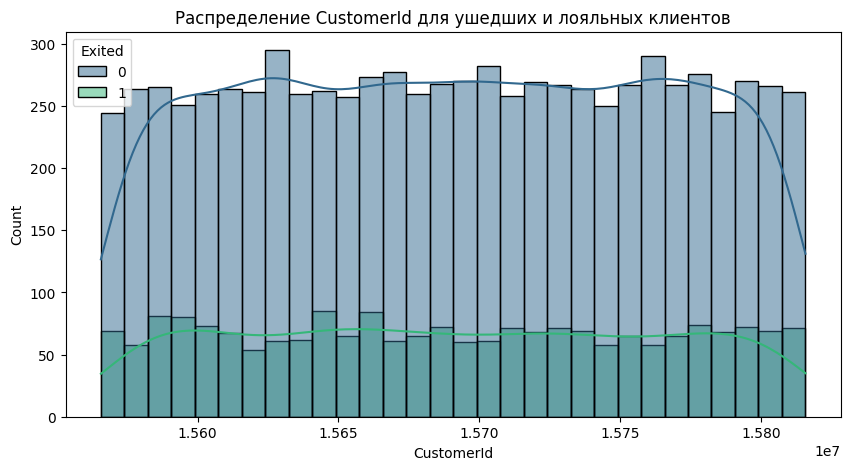

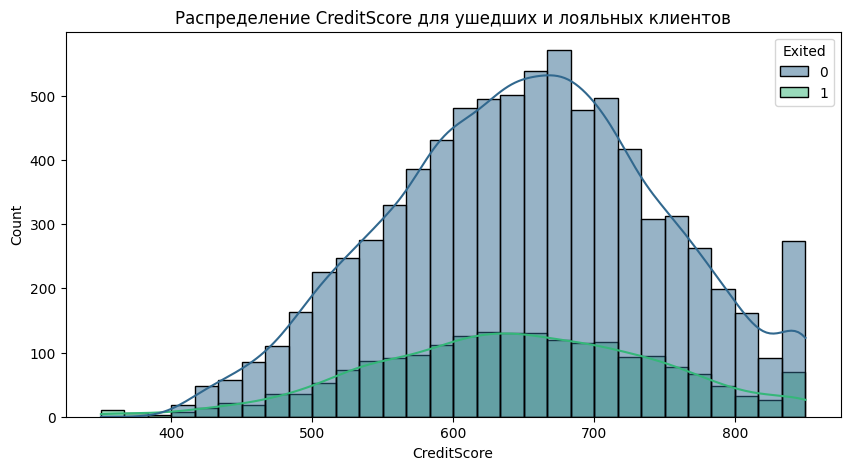

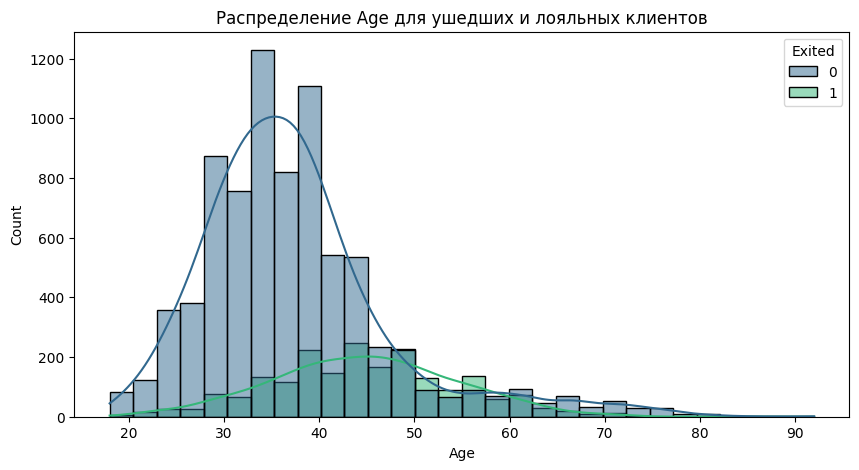

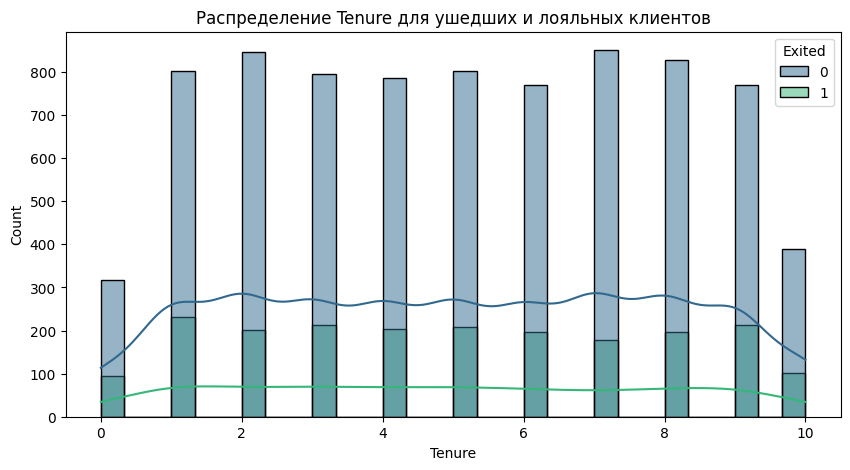

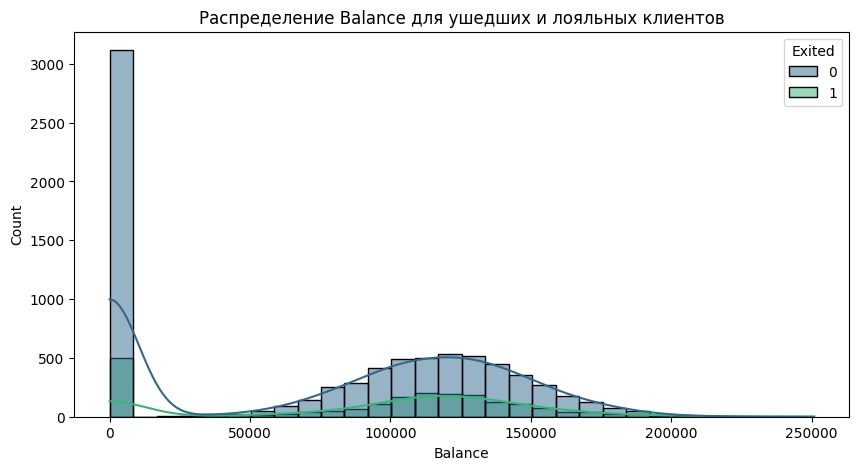

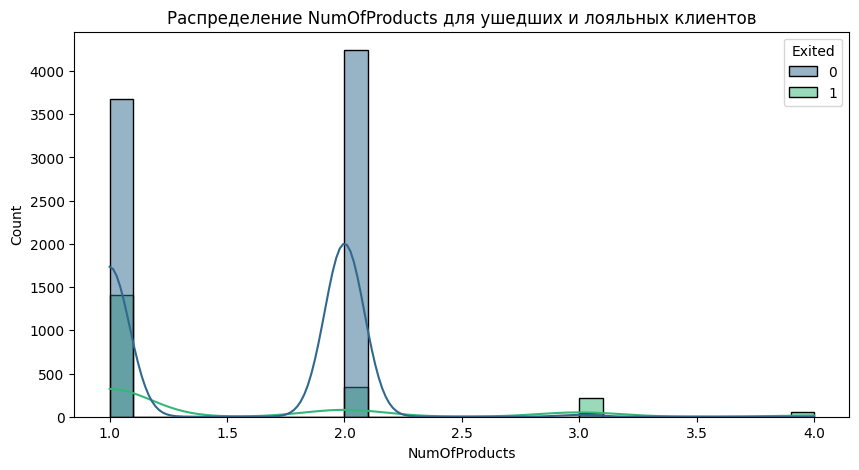

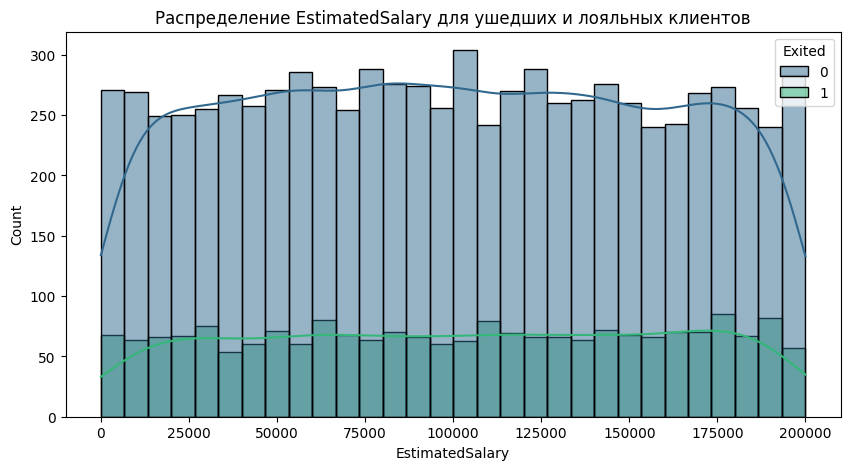

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=churn_data, x=col, hue='Exited', kde=True, bins=30, palette='viridis')
    plt.title(f'Распределение {col} для ушедших и лояльных клиентов')
    plt.show()

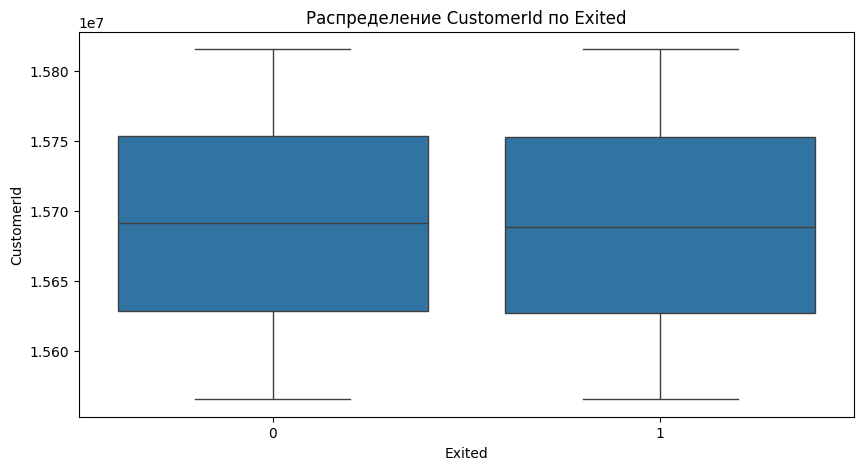

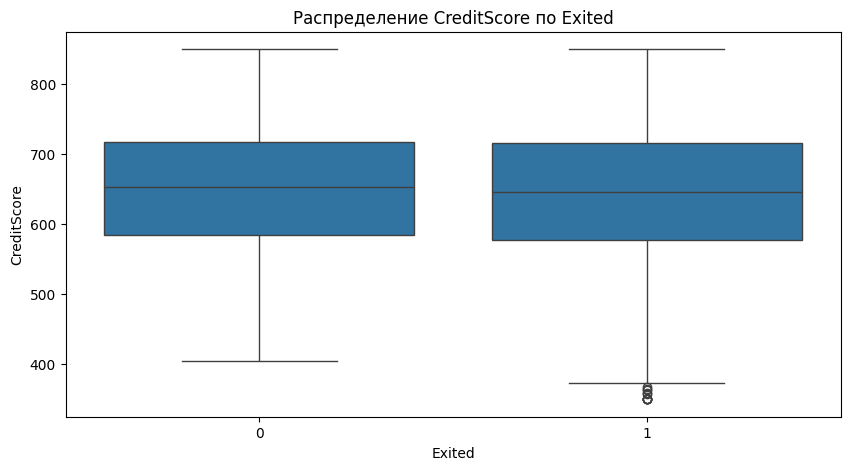

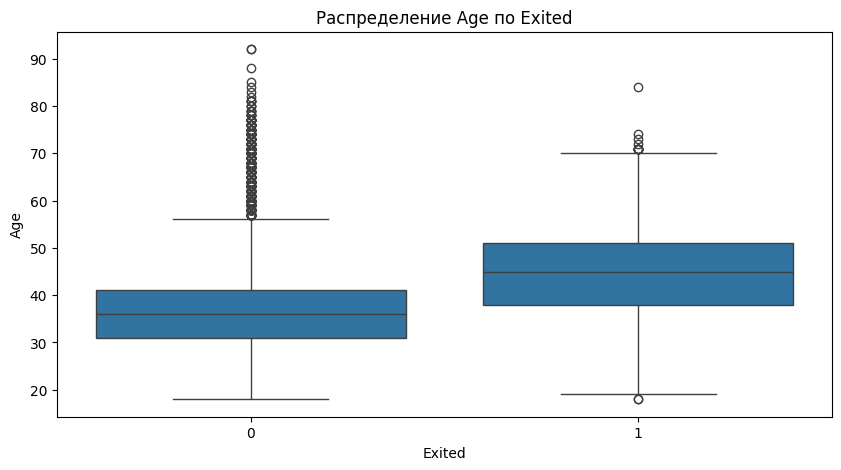

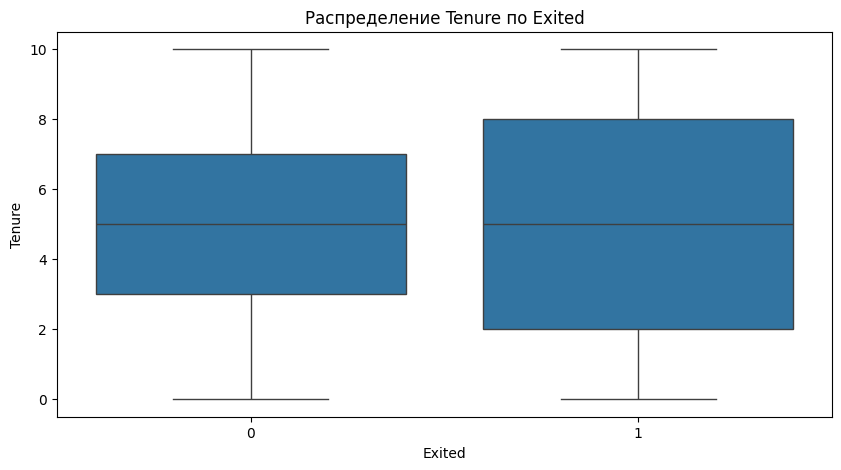

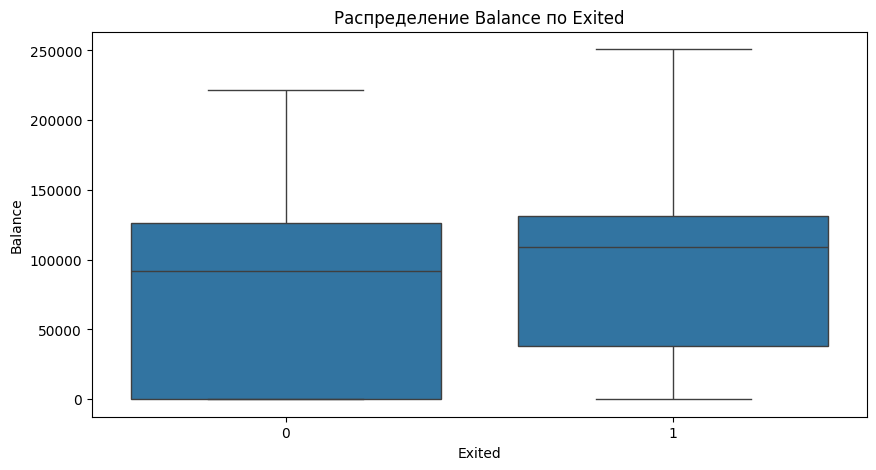

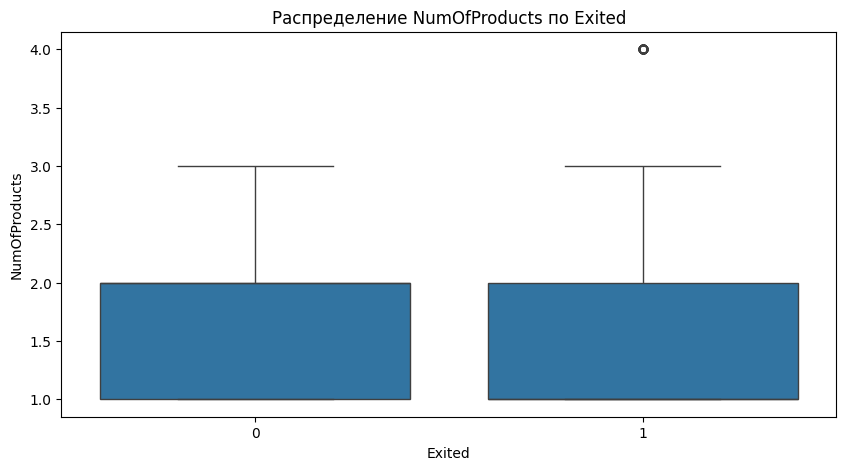

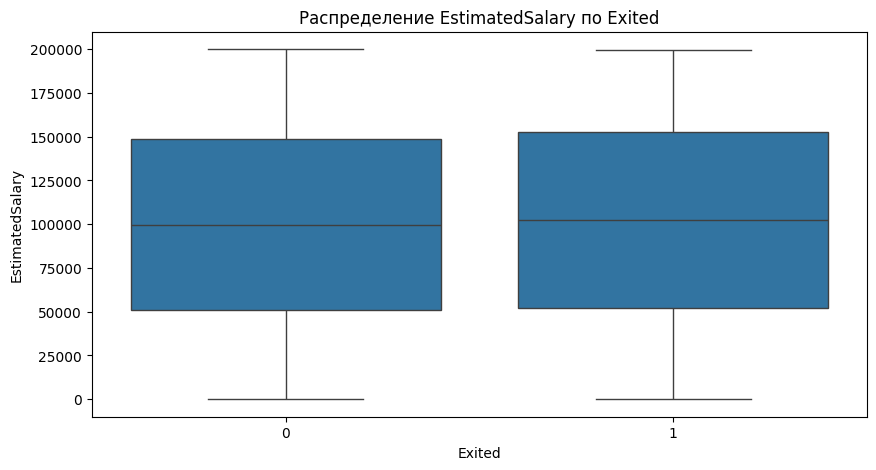

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Exited', y=col, data=churn_data)
    plt.title(f'Распределение {col} по Exited')
    plt.show()

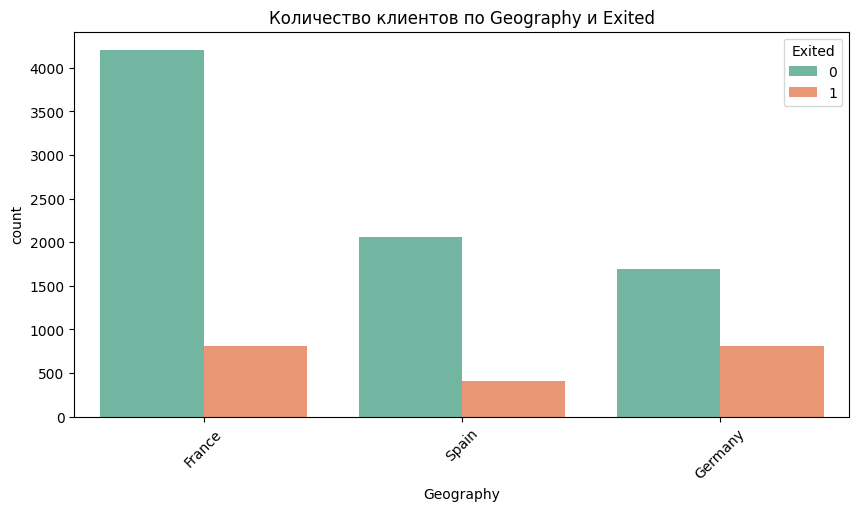

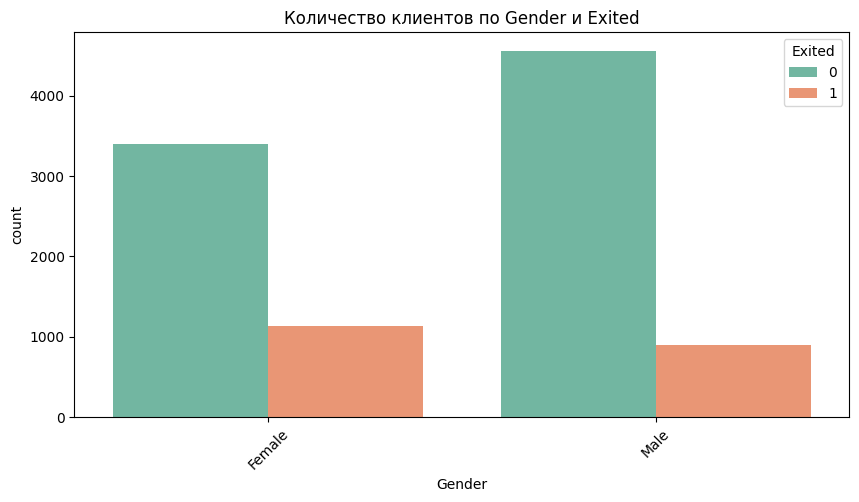

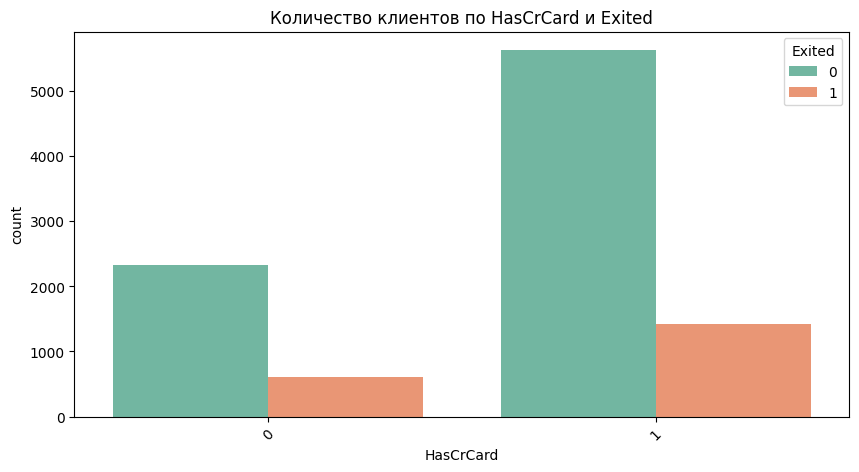

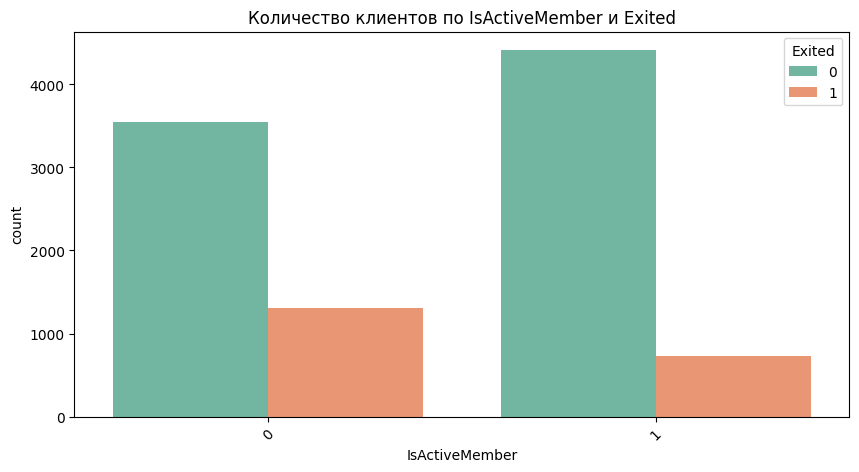

In [11]:
for col in cat_cols[1:]:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Exited', data=churn_data, palette='Set2')
    plt.title(f'Количество клиентов по {col} и Exited')
    plt.xticks(rotation=45)
    plt.show()

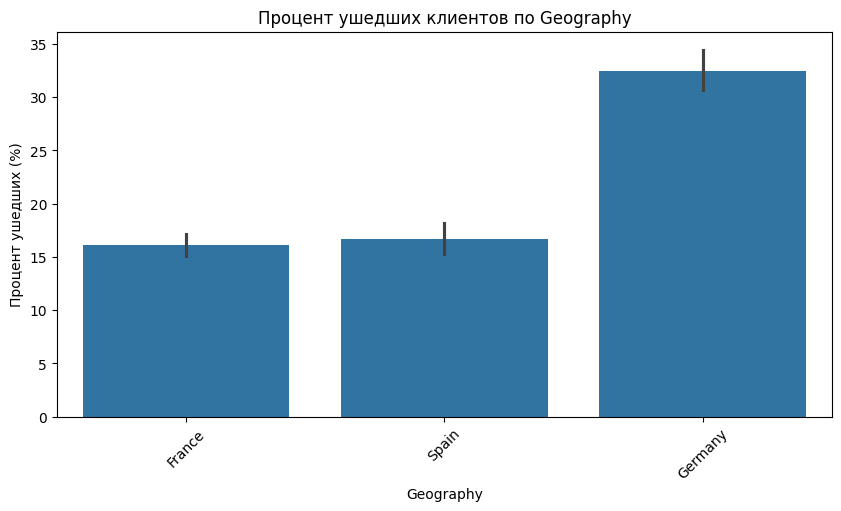

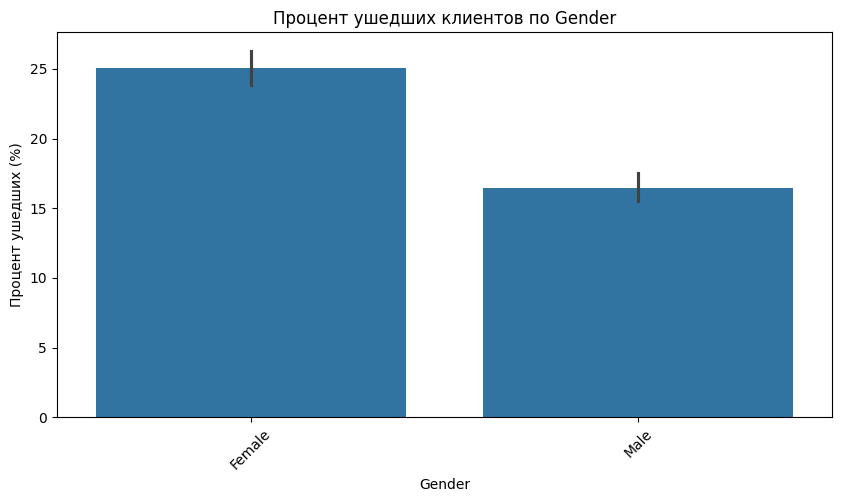

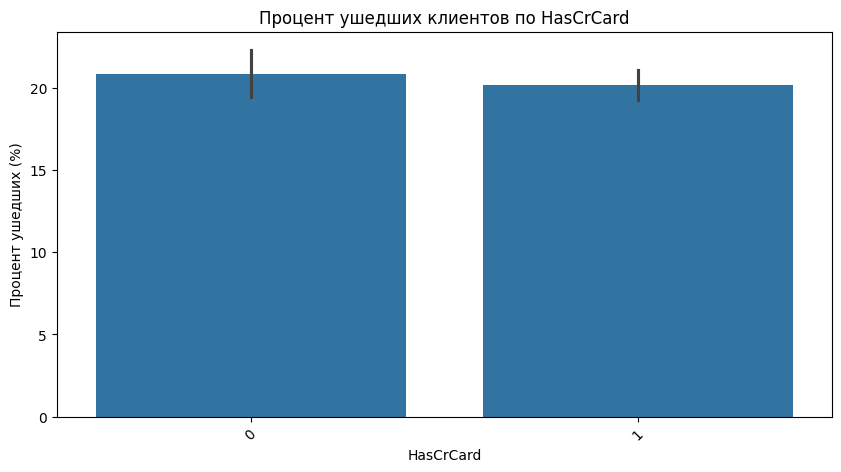

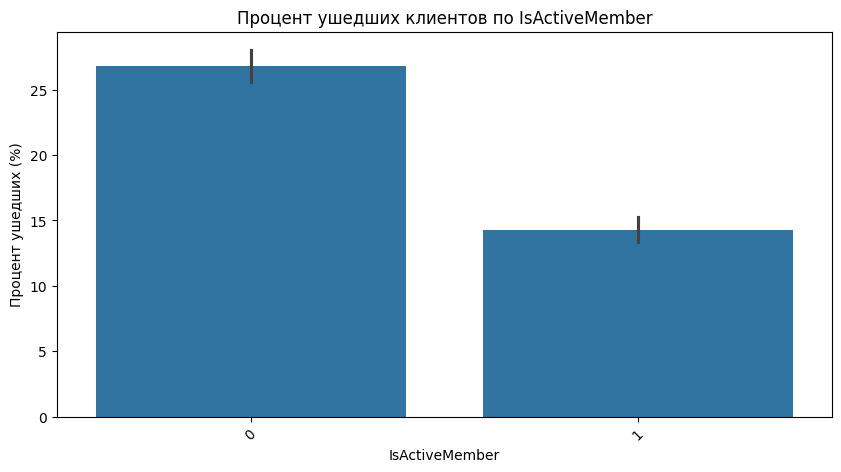

In [12]:
for col in cat_cols[1:]:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='Exited', data=churn_data, estimator=lambda x: sum(x) / len(x) * 100)
    plt.title(f'Процент ушедших клиентов по {col}')
    plt.ylabel('Процент ушедших (%)')
    plt.xticks(rotation=45)
    plt.show()

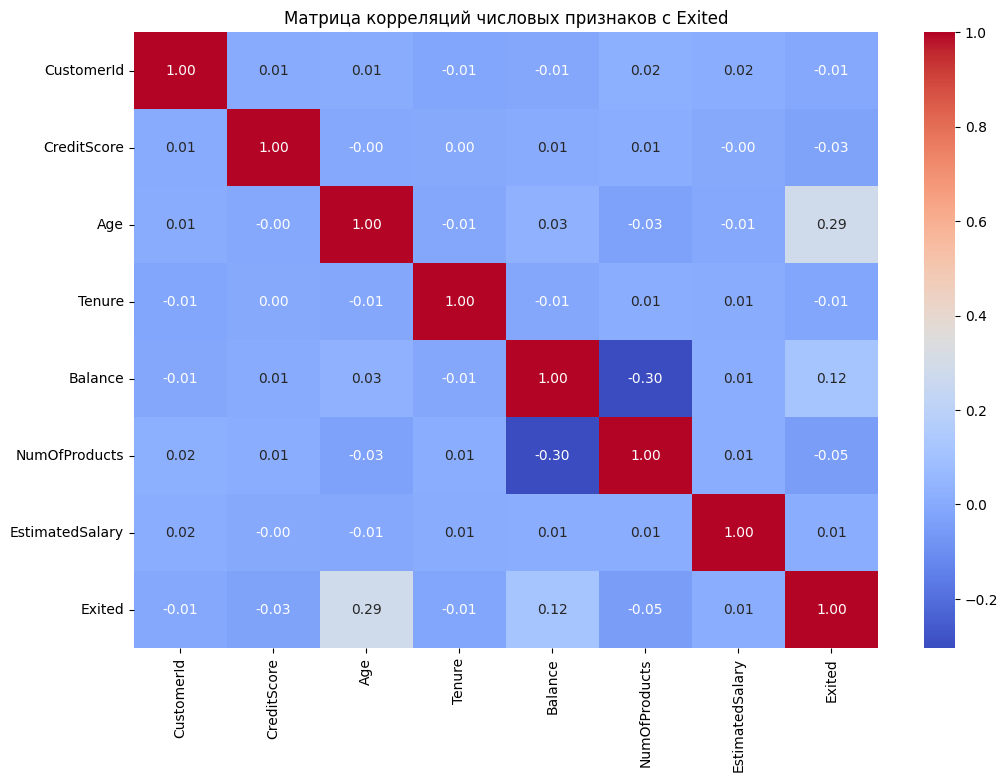

In [13]:
plt.figure(figsize=(12, 8))
corr = churn_data[numeric_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций числовых признаков с Exited')
plt.show()

Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка.

In [14]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 13)

In [15]:
churn_data = churn_data.drop(['Geography', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


### Создание признаков

* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

In [16]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / churn_data['Age']
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [17]:
print(churn_data.describe().round(2))

       CreditScore   Gender      Age   Tenure    Balance  NumOfProducts  \
count      2509.00  2509.00  2509.00  2509.00    2509.00        2509.00   
mean        651.45     0.52    39.77     5.01  119730.12           1.52   
std          98.17     0.50    10.52     2.94   27022.01           0.62   
min         350.00     0.00    18.00     0.00   27288.43           1.00   
25%         584.00     0.00    32.00     2.00  102800.72           1.00   
50%         651.00     1.00    38.00     5.00  119703.10           1.00   
75%         722.00     1.00    45.00     8.00  137560.38           2.00   
max         850.00     1.00    84.00    10.00  214346.96           4.00   

       HasCrCard  IsActiveMember  EstimatedSalary   Exited  \
count    2509.00          2509.0          2509.00  2509.00   
mean        0.71             0.5        101113.44     0.32   
std         0.45             0.5         58263.01     0.47   
min         0.00             0.0            11.58     0.00   
25%         0.

In [18]:
stats = churn_data.describe().round(2)
high_std_features = stats.columns[stats.loc['std'] > 1].tolist()
print("Признаки с std > 1:", high_std_features)

Признаки с std > 1: ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'BalanceSalaryRatio', 'CreditScoreGivenAge']


Данные несбалансрованы. В тренировочную выборку могут попасть только лояльные клиенты. Или наоборот.\
Нужно сделать так чтобы в тренировочной выборке было одинаковое соотношение клиентов

In [19]:
X = churn_data.drop("Exited", axis=1)
y = churn_data["Exited"]
print(y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Exited
0    0.675568
1    0.324432
Name: proportion, dtype: float64
Train shape: (1881, 12)
Test shape: (628, 12)


In [20]:
# Распределение признаков ненормальное -> RobustScaler. Для Balance распределние близко к номральному,
# но признак имеет выбросы, что видно из boxplot
from sklearn.preprocessing import RobustScaler, StandardScaler
scaler_r = RobustScaler()
scaler_s = StandardScaler()
# Выбор признаков для каждого скейлера
robust_features = high_std_features.copy()
robust_features.remove('BalanceSalaryRatio')
standard_features = ['BalanceSalaryRatio']
# Стандартизация X
X[high_std_features] = scaler_r.fit_transform(X[high_std_features])
X['BalanceSalaryRatio'] = scaler_s.fit_transform(X[['BalanceSalaryRatio']])
# Масштабирование tain данных
X_train_robust = scaler_r.fit_transform(X_train[robust_features])
X_train_standard = scaler_s.fit_transform(X_train[standard_features])
# Применение к test-данным
X_test_robust = scaler_r.transform(X_test[robust_features])
X_test_standard = scaler_s.transform(X_test[standard_features])
# Объединение масштабирования данных
X_train_scaled = np.hstack([X_train_robust, X_train_standard])
X_test_scaled = np.hstack([X_test_robust, X_test_standard])
print("Средние значения (train):", X_train_scaled.mean(axis=0))
print("Стандартные отклонения (train):", X_train_scaled.std(axis=0))
print("Средние значения (test):", X_test_scaled.mean(axis=0))
print("Стандартные отклонения (test):", X_test_scaled.std(axis=0))

Средние значения (train): [ 1.27400472e-02  1.31681184e-01  1.14832536e-02  3.96411795e-03
 -1.21290038e-02  9.25429667e-02  3.77747334e-18]
Стандартные отклонения (train): [0.70129832 0.8177859  0.58176799 0.78143655 0.57012522 0.75496861
 1.        ]
Средние значения (test): [-0.02512258  0.150049   -0.02643312 -0.00354485 -0.01453804  0.04501489
 -0.00984026]
Стандартные отклонения (test): [0.71958568 0.78194701 0.6011682  0.75905464 0.54509234 0.72646514
 0.24041077]


### Обучение стандартизатора

Будет использоваться F1-мера, как компромисс, между percision и recall

### Моделирование

По условию задачи, модель должна своевременно предсказывать отток клиентов. Известно, что для сохранения клиентов банк будет использовать ресурсы колл-центра и клиентам, у которых вероятность оттока наиболее высока, будут сделаны специальные предложения. Ресурсы, выделяемые на сохранение клиентов, ограничены, поэтому нам важно минимизировать количество звонков. Однако в то же время необходимо сохранить как можно больше клиентов.

Таким образом, хотелось бы минимизировать как ложноположительные и ложноотрицательные срабатывания модели

F1 score test: 0.50
F1 score train: 0.52


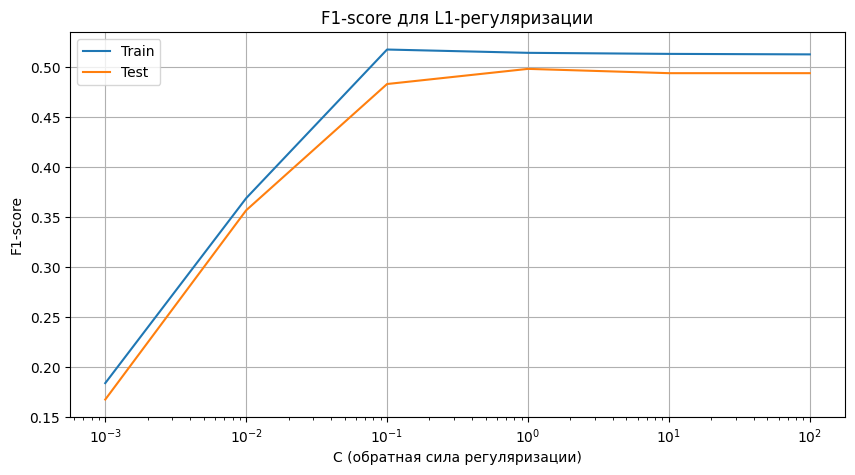

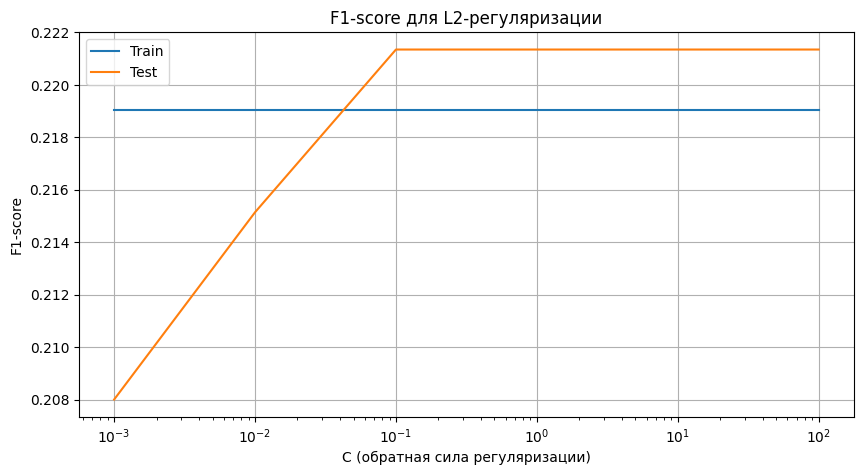

In [21]:
# Создание модели логичтсиечской регрессии с воспроизводимым результатом
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=2000)
# Обучение модели
log_reg_full.fit(X_train, y_train)
# Предсказание значений для тестовой и тренировочной выборок
y_pred_test = log_reg_full.predict(X_test)
y_pred_train = log_reg_full.predict(X_train)
# Вывод значений метрики
print('F1 score test: {:.2f}'.format(metrics.f1_score(y_test, y_pred_test)))
print('F1 score train: {:.2f}'.format(metrics.f1_score(y_train, y_pred_train)))
from sklearn.linear_model import LogisticRegression
# Параметры для исследования
penalties = ['l1', 'l2']
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
results = {'train': [], 'test': []}
for penalty in penalties:
    for C in C_values:
        model = LogisticRegression(penalty=penalty, C=C, solver='liblinear', random_state=42)
        model.fit(X_train, y_train)
        # Сохраняем метрики
        results['train'].append(metrics.f1_score(y_train, model.predict(X_train)))
        results['test'].append(metrics.f1_score(y_test, model.predict(X_test)))
    # Визуализация
    plt.figure(figsize=(10, 5))
    plt.semilogx(C_values, results['train'][-len(C_values):], label='Train')
    plt.semilogx(C_values, results['test'][-len(C_values):], label='Test')
    plt.title(f'F1-score для {penalty.upper()}-регуляризации')
    plt.xlabel('C (обратная сила регуляризации)')
    plt.ylabel('F1-score')
    plt.legend()
    plt.grid()
    plt.show()

Модель удовлетворяет, так как на тестовой выборке значение метрики 0.5

In [22]:
# Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train_scaled)
# Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
# Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
# Выводим результирующие размерности таблиц
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)
from sklearn.metrics import f1_score
# Обучаем модель, минимизируя logloss на тернировочных данных
log_reg_poly = LogisticRegression(random_state=42, max_iter=1000)
log_reg_poly.fit(X_train_scaled_poly, y_train)
# Предсказания и оценка
y_train_pred = log_reg_poly.predict(X_train_scaled_poly)
y_test_pred = log_reg_poly.predict(X_test_scaled_poly)
f1_train_poly = f1_score(y_train, y_train_pred)
f1_test_poly = f1_score(y_test, y_test_pred)
print(f"F1-score (train): {f1_train_poly:.4f}")
print(f"F1-score (test): {f1_test_poly:.4f}")

(1881, 119)
(628, 119)
F1-score (train): 0.6066
F1-score (test): 0.5646


Качество модели улучшилось, метрика на тестовых данных увеличилась

### Подбор порогового значения вероятности

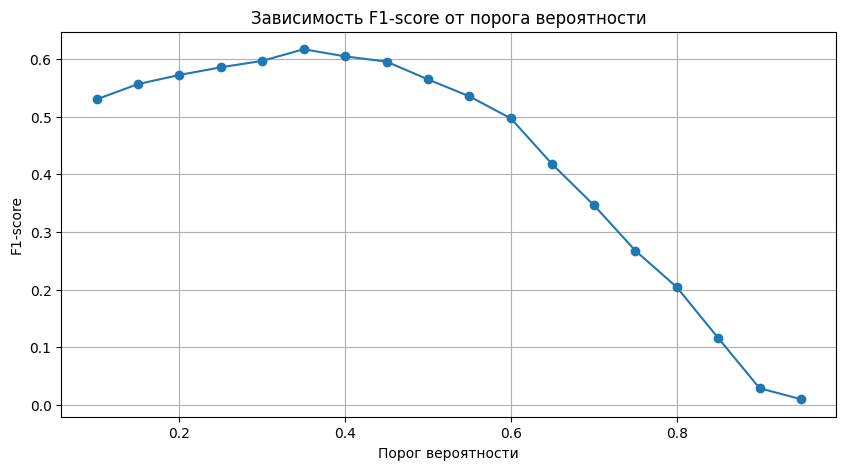

Оптимальный порог: 0.35
Лучший F1-score: 0.6171

Результаты с оптимальным порогом:
F1 train: 0.6427
F1 test: 0.6171


In [23]:
# Предсказание вероятностей на тестовой выборке
y_pred_proba = log_reg_poly.predict_proba(X_test_scaled_poly)[:, 1]
# Подбор оптимального порога
thresholds = np.arange(0.1, 1, 0.05)
f1_scores = []
for thresh in thresholds:
    y_pred = (y_pred_proba > thresh).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, 'o-')
plt.title('Зависимость F1-score от порога вероятности')
plt.xlabel('Порог вероятности')
plt.ylabel('F1-score')
plt.grid()
plt.show()
# Нахождение оптимального порога
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
print(f"Оптимальный порог: {best_thresh:.2f}")
print(f"Лучший F1-score: {best_f1:.4f}")
# Применение лучшего порога
y_train_pred_opt = (log_reg_poly.predict_proba(X_train_scaled_poly)[:, 1] > best_thresh).astype(int)
y_test_pred_opt = (y_pred_proba > best_thresh).astype(int)
print("\nРезультаты с оптимальным порогом:")
print(f"F1 train: {f1_score(y_train, y_train_pred_opt):.4f}")
print(f"F1 test: {f1_score(y_test, y_test_pred_opt):.4f}")

Подбор оптимального порога вероятности улучшил качество модели, увеличив значение местрики на тестовой выборке

### Обучение с помощью дерева

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y, 
    random_state=0
)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1881, 12)
Test shape: (628, 12)


### Пример определения